In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

In [ ]:
# Step 1: Load and preprocess the dataset
data = pd.read_csv('/content/heart_disease_dataset.csv')

# Drop irrelevant columns (e.g., 'id', 'dataset')
data_cleaned = data.drop(columns=['id', 'dataset', 'num', 'thal', 'ca', 'slope'], errors='ignore')

In [ ]:
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 72.0+ KB


In [ ]:
numerical_cols=['age','trestbps','chol','thalch','oldpeak']

In [ ]:
# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object', 'bool']).columns

# Step 2: Initialize an empty list to store the one-hot encoded columns
encoded_columns = []

# Step 3: Loop through each categorical column, apply one-hot encoding, and handle NaN values
for col in categorical_columns:
    # Perform one-hot encoding on the current column
    encoded_df = pd.get_dummies(data_cleaned[col], prefix=col, dummy_na=False, drop_first=True)

    # Manually set NaN in the one-hot encoded columns where the original value was NaN
    encoded_df[data_cleaned[col].isna()] = np.nan
    # Append the encoded DataFrame to the list of encoded columns
    encoded_columns.append(encoded_df)

# Step 4: Concatenate all encoded columns back into a single DataFrame
data_encoded_df = pd.concat(encoded_columns, axis=1)

# Display the final DataFrame
print(data_encoded_df)

     sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina fbs_True  \
0        True               False           False               True     True   
1        True               False           False              False    False   
2        True               False           False              False    False   
3        True               False            True              False    False   
4       False                True           False              False    False   
..        ...                 ...             ...                ...      ...   
915     False               False           False              False     True   
916      True               False           False               True    False   
917      True               False           False              False     True   
918      True               False           False              False     True   
919      True                True           False              False    False   

    restecg_normal restecg_

<ipython-input-6-96260c824ee4>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_df[data_cleaned[col].isna()] = np.nan
<ipython-input-6-96260c824ee4>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_df[data_cleaned[col].isna()] = np.nan
<ipython-input-6-96260c824ee4>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  encoded_df[data_cleaned[col].isna()] = np.nan
<ipython-input-6-96260c824ee4>:13: FutureWarning: Setting an item of incompatible dtype is 

In [ ]:
# Step 6: Save the cleaned dataset as CSV
output_csv_path = '/content/heart_disease_data_encoded_v1.csv'
data_encoded_df.to_csv(output_csv_path, index=False)

print(f"Cleaned data saved as CSV: {output_csv_path}")

Cleaned data saved as CSV: /content/heart_disease_data_encoded_v1.csv


In [ ]:
data_encoded = pd.concat([data_encoded_df, data_cleaned[numerical_cols]], axis=1)

In [ ]:
# Step 6: Save the cleaned dataset as CSV
output_csv_path = '/content/heart_disease_data_encoded_vf.csv'
data_encoded.to_csv(output_csv_path, index=False)

print(f"Cleaned data saved as CSV: {output_csv_path}")

Cleaned data saved as CSV: /content/heart_disease_data_encoded_vf.csv


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_Male                  920 non-null    bool   
 1   cp_atypical angina        920 non-null    bool   
 2   cp_non-anginal            920 non-null    bool   
 3   cp_typical angina         920 non-null    bool   
 4   fbs_True                  830 non-null    object 
 5   restecg_normal            918 non-null    object 
 6   restecg_st-t abnormality  918 non-null    object 
 7   exang_True                865 non-null    object 
 8   age                       920 non-null    int64  
 9   trestbps                  861 non-null    float64
 10  chol                      890 non-null    float64
 11  thalch                    865 non-null    float64
 12  oldpeak                   858 non-null    float64
dtypes: bool(4), float64(4), int64(1), object(4)
memory usage: 68.4+ K

In [ ]:
# Step 1: Replace `0` with NaN for specific columns (chol and trestbps only)
columns_to_replace_zeros = ['chol', 'trestbps']
data_encoded[columns_to_replace_zeros] = data_encoded[columns_to_replace_zeros].replace(0, np.nan)

# Step 2: Identify numerical columns and apply MinMaxScaler BEFORE imputation
numerical_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Step 3: Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_cleaned_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

# Step 4: Ensure categorical columns are converted back to integers (if necessary)
categorical_cols = [col for col in data_encoded.columns if col not in numerical_cols]
for col in categorical_cols:
    data_cleaned_imputed[col] = data_cleaned_imputed[col].round().astype(int)

# Step 5: Save the cleaned dataset
output_csv_path = '/content/heart_disease_cleaned_with_knn.csv'
data_cleaned_imputed.to_csv(output_csv_path, index=False)

print(f"Cleaned data saved as CSV: {output_csv_path}")

Cleaned data saved as CSV: /content/heart_disease_cleaned_with_knn.csv


In [ ]:
data_cleaned_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_Male                  920 non-null    int64  
 1   cp_atypical angina        920 non-null    int64  
 2   cp_non-anginal            920 non-null    int64  
 3   cp_typical angina         920 non-null    int64  
 4   fbs_True                  920 non-null    int64  
 5   restecg_normal            920 non-null    int64  
 6   restecg_st-t abnormality  920 non-null    int64  
 7   exang_True                920 non-null    int64  
 8   age                       920 non-null    float64
 9   trestbps                  920 non-null    float64
 10  chol                      920 non-null    float64
 11  thalch                    920 non-null    float64
 12  oldpeak                   920 non-null    float64
dtypes: float64(5), int64(8)
memory usage: 93.6 KB


In [ ]:
# Validate that there are no missing values in the dataset
missing_values_summary = data_cleaned_imputed.isnull().sum()

# Display columns with missing values (if any)
missing_values = missing_values_summary[missing_values_summary > 0]

if missing_values.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values found in the following columns:")
    print(missing_values)

No missing values in the dataset.


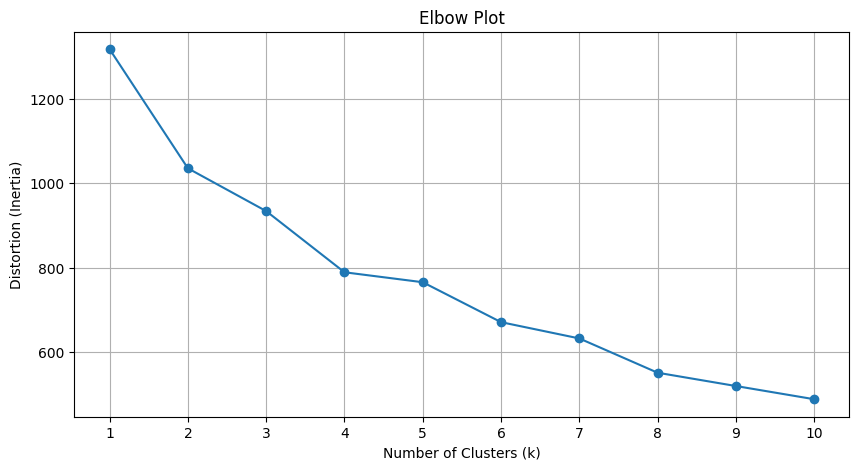

In [ ]:
# Step 3: Elbow Plot to determine optimal clusters
distortions = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cleaned_imputed)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(k_range, distortions, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# Step 4: K-means clustering with chosen number of clusters
optimal_k = 4  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_cleaned_imputed)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(data_cleaned_imputed, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_avg}")

K-means Silhouette Score: 0.25231737332009074


In [ ]:
# Step 5: Hierarchical clustering
hierarchical_linkage = linkage(data_cleaned_imputed, method='ward')
hierarchical_labels = fcluster(hierarchical_linkage, t=optimal_k, criterion='maxclust')

In [ ]:
# Evaluate clustering using silhouette score
silhouette_avg_H = silhouette_score(data_cleaned_imputed, hierarchical_labels)
print(f"Hierarchical Silhouette Score: {silhouette_avg_H}")

Hierarchical Silhouette Score: 0.1741900155278896


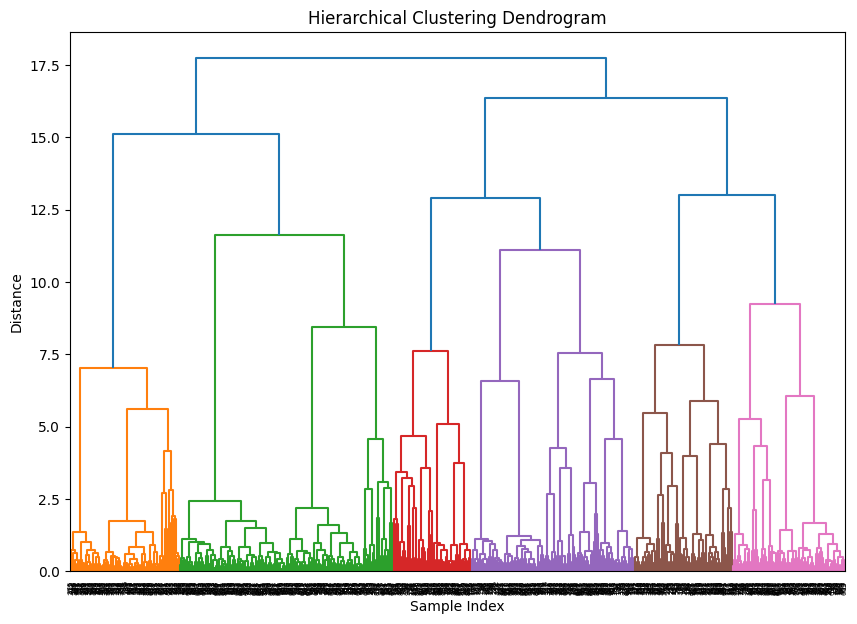

In [ ]:
# Visualize hierarchical clustering dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_linkage)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Add clustering results to the dataset
data_cleaned_imputed['KMeans_Cluster'] = kmeans_labels
data_cleaned_imputed['Hierarchical_Cluster'] = hierarchical_labels

In [ ]:
# Step 6: Feature evaluation for clustering
feature_importance = permutation_importance(
    kmeans,
    data_cleaned_imputed.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']),
    kmeans.labels_
)
importance_scores = pd.DataFrame({
    'Feature': data_cleaned_imputed.drop(columns=['KMeans_Cluster', 'Hierarchical_Cluster']).columns,
    'Importance': feature_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_scores)

# Optional: Save the processed dataset with clustering labels
data_cleaned_imputed.to_csv('/content/heart_disease_clustered.csv', index=False)

                     Feature  Importance
1         cp_atypical angina  103.882668
5             restecg_normal   96.052195
6   restecg_st-t abnormality   80.423158
7                 exang_True   79.223905
2             cp_non-anginal   74.722428
0                   sex_Male   19.056784
4                   fbs_True   13.818528
11                    thalch    9.716623
8                        age    6.485366
12                   oldpeak    3.094895
3          cp_typical angina    2.572349
9                   trestbps    1.286571
10                      chol    0.135935


In [ ]:
# Select the top 5 important features
selected_features = ['cp_atypical angina', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'cp_non-anginal', 'sex_Male', 'fbs_True']
data_selected = data_cleaned_imputed[selected_features]

In [ ]:
# Step 3: Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_selected)

K-means Silhouette Score with PCA: 0.6617567906581087


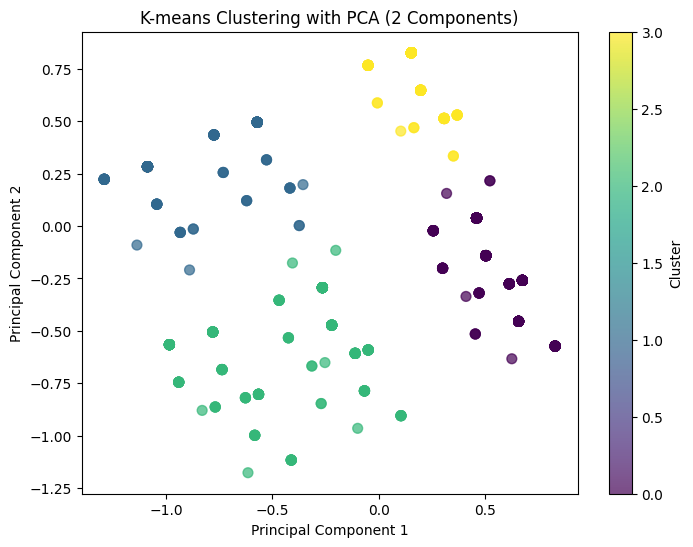

In [ ]:
# Step 4: K-means clustering on PCA-reduced data
optimal_k = 4  # Based on the elbow plot
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(data_pca)

# Evaluate clustering using silhouette score
silhouette_avg_pca = silhouette_score(data_pca, kmeans_pca_labels)
print(f"K-means Silhouette Score with PCA: {silhouette_avg_pca}")

# Visualize K-means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("K-means Clustering with PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

K-means Silhouette Score with PCA: 0.6613119522442342


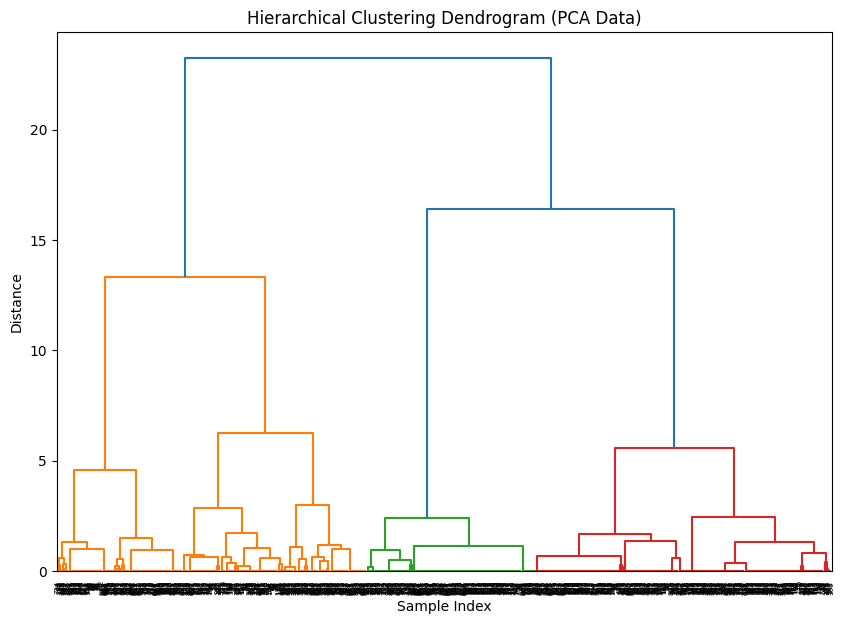

In [ ]:
# Step 5: Hierarchical clustering
hierarchical_linkage = linkage(data_pca, method='ward')
hierarchical_labels = fcluster(hierarchical_linkage, t=optimal_k, criterion='maxclust')

# Evaluate clustering using silhouette score
silhouette_avg_pca_H = silhouette_score(data_pca, hierarchical_labels)
print(f"K-means Silhouette Score with PCA: {silhouette_avg_pca_H}")

# Visualize hierarchical clustering dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_linkage)
plt.title("Hierarchical Clustering Dendrogram (PCA Data)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Step 6: Add clustering results to the dataset
data_cleaned_imputed['KMeans_PCA_Cluster'] = kmeans_pca_labels
data_cleaned_imputed['Hierarchical_PCA_Cluster'] = hierarchical_labels

# Step 7: Save the results
output_file_path = '/content/heart_disease_clustering_with_updated_features_v1.csv'
data_cleaned_imputed.to_csv(output_file_path, index=False)
print(f"Clustering results saved to {output_file_path}")

Clustering results saved to /content/heart_disease_clustering_with_updated_features_v1.csv


In [16]:
# Step 1: Load the clustering dataset
file_path = '/content/heart_disease_clustering_PCA_KNN_with_updated_features_v1 (1).csv'
data_LOF = pd.read_csv(file_path)

In [23]:
# Define the numerical columns to be used for LOF
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

For exploratory analysis or preventive health monitoring: Use threshold = 1 to capture as many potential anomalies as possible.
For critical interventions: Use threshold = 1.5 to focus on the most significant outliers.

In [44]:
# Step 3: Process each cluster individually and apply LOF
clusters = data_LOF['KMeans_PCA_Cluster'].unique()
outliers = pd.DataFrame()

for cluster in clusters:
    cluster_data = data_LOF[data_LOF['KMeans_PCA_Cluster'] == cluster]

    # Select numerical features explicitly for LOF
    lof_features = cluster_data[numerical_columns]

    # Apply LOF and get LOF scores
    lof = LocalOutlierFactor(n_neighbors=5)  # Initialize LOF
    lof.fit(lof_features)  # Fit the LOF model to the cluster data
    cluster_data['lof_scores'] = -lof.negative_outlier_factor_  # Access LOF scores (negative factor is inverted)

    # Identify outliers based on a threshold (e.g., LOF score > 1.5)
    cluster_data['outlier'] = cluster_data['lof_scores'] > 1.5

    # Concatenate the results
    outliers = pd.concat([outliers, cluster_data])

<ipython-input-44-ebb712cb7196>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['lof_scores'] = -lof.negative_outlier_factor_  # Access LOF scores (negative factor is inverted)
<ipython-input-44-ebb712cb7196>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['outlier'] = cluster_data['lof_scores'] > 1.5
<ipython-input-44-ebb712cb7196>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [45]:
# Step 4: Save the updated dataset with LOF scores and outlier column
output_file_path = '/content/heart_disease_with_lof_analysis.xlsx'
outliers.to_excel(output_file_path, index=False)

print(f"The updated dataset with LOF scores and outlier labels has been saved to: {output_file_path}")

The updated dataset with LOF scores and outlier labels has been saved to: /content/heart_disease_with_lof_analysis.xlsx


In [46]:
# Step 1: Load the dataset with LOF scores and outlier information
# Update the path to your dataset file
lof_data_path = '/content/heart_disease_with_lof_analysis.xlsx'
outliers = pd.read_excel(lof_data_path)


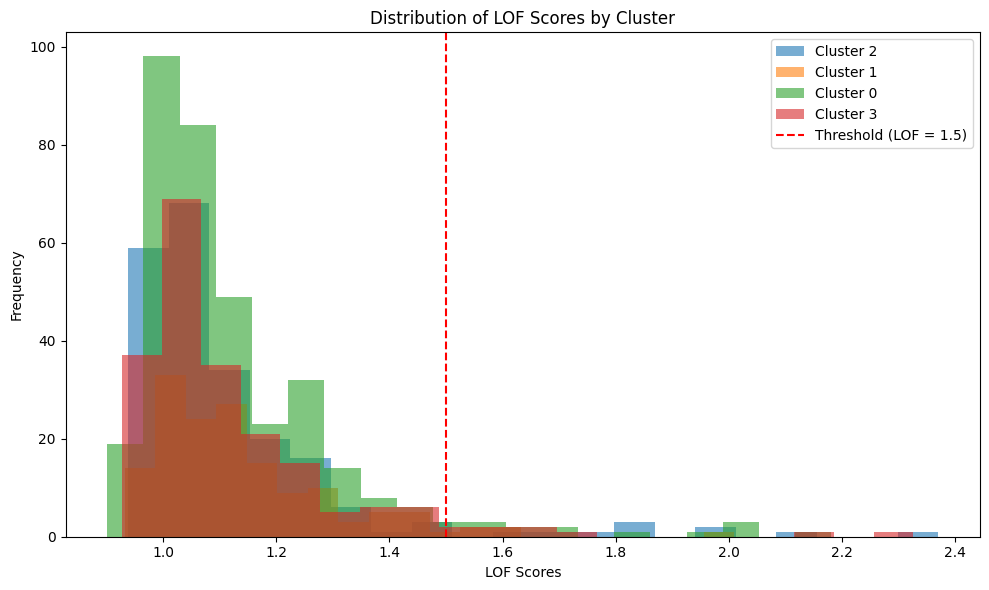

In [48]:
# Step 2: Create the first graph - Distribution of LOF Scores by Cluster
plt.figure(figsize=(10, 6))
for cluster in outliers['KMeans_PCA_Cluster'].unique():
    cluster_subset = outliers[outliers['KMeans_PCA_Cluster'] == cluster]
    plt.hist(cluster_subset['lof_scores'], bins=20, alpha=0.6, label=f'Cluster {cluster}')

plt.axvline(1.5, color='red', linestyle='--', label='Threshold (LOF = 1.5)')
plt.title('Distribution of LOF Scores by Cluster')
plt.xlabel('LOF Scores')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

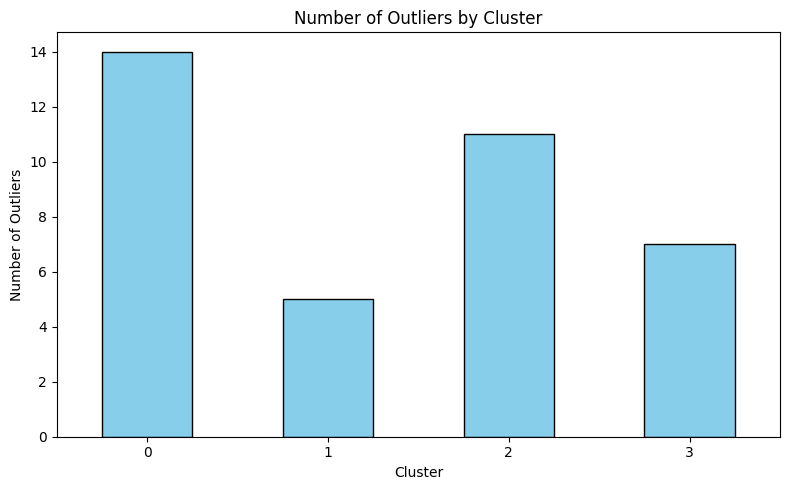

In [49]:

# Step 3: Create the second graph - Number of Outliers by Cluster
outliers_by_cluster = outliers.groupby('KMeans_PCA_Cluster')['outlier'].sum()

plt.figure(figsize=(8, 5))
outliers_by_cluster.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Outliers by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
# Step 1: Load the dataset
lof_data_path = '/content/heart_disease_clustering_analysis.csv'
outliers = pd.read_csv(lof_data_path)

In [69]:
# Step 2: Define key health metrics and clustering columns
key_metrics = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cluster_column = 'KMeans_PCA_Cluster'
outlier_column = 'outlier'

In [70]:
# Step 3: Initialize an empty dictionary to store health profiles
health_profiles = {}

In [71]:
# Step 4: Analyze each cluster
for cluster in outliers[cluster_column].unique():
    cluster_data = outliers[outliers[cluster_column] == cluster]
    inliers = cluster_data[cluster_data[outlier_column] == False]
    outliers_cluster = cluster_data[cluster_data[outlier_column] == True]

    # Compute central tendency and variability for inliers
    inlier_summary = {
        'mean': inliers[key_metrics].mean(),
        'median': inliers[key_metrics].median(),
        'std': inliers[key_metrics].std(),
        'iqr': inliers[key_metrics].quantile(0.75) - inliers[key_metrics].quantile(0.25)
    }

    # Compute central tendency and variability for outliers
    outlier_summary = {
        'mean': outliers_cluster[key_metrics].mean(),
        'median': outliers_cluster[key_metrics].median(),
        'std': outliers_cluster[key_metrics].std(),
        'iqr': outliers_cluster[key_metrics].quantile(0.75) - outliers_cluster[key_metrics].quantile(0.25)
    }

    # Store the results in the health_profiles dictionary
    health_profiles[f'Cluster {cluster}'] = {
        'Inliers': inlier_summary,
        'Outliers': outlier_summary
    }

In [72]:
# Step 5: Display health profiles for each cluster
for cluster, profile in health_profiles.items():
    print(f"\nHealth Profile for {cluster}")
    print("Inliers:")
    print(profile['Inliers'])
    print("\nOutliers:")
    print(profile['Outliers'])


Health Profile for Cluster 2
Inliers:
{'mean': age          55.425121
trestbps    133.653846
chol        206.361386
thalch      143.863388
oldpeak       0.746111
dtype: float64, 'median': age          56.0
trestbps    130.0
chol        227.5
thalch      149.0
oldpeak       0.0
dtype: float64, 'std': age           9.959283
trestbps     18.811245
chol        106.416123
thalch       27.168945
oldpeak       1.153976
dtype: float64, 'iqr': age         14.000
trestbps    25.000
chol        83.500
thalch      36.500
oldpeak      1.325
dtype: float64}

Outliers:
{'mean': age          54.200000
trestbps    127.222222
chol        189.700000
thalch      146.888889
oldpeak       0.622222
dtype: float64, 'median': age          56.0
trestbps    126.0
chol        221.5
thalch      158.0
oldpeak       0.0
dtype: float64, 'std': age           6.214678
trestbps     16.045075
chol        110.876358
thalch       26.741561
oldpeak       0.881445
dtype: float64, 'iqr': age           6.25
trestbps     10.00